# Project 1

## Introduction

In the 2020 U.S. election, the Republican presidential candidate Donald Trump failed to be re-elected as the President of the United States. Many Republicans who oppose Trump want to hold him accountable for their loss in the 2020 presidential election. But is Donald Trump really the person to blame? Or it is just people's unfavourable views on the Republican party that result in the Republicans' failure. Two investigations are conducted in this project to find out whether Trump is really dragging down the Republican Party in the 2020 presidential election.

Numerous scholarly works have explored a comparable inquiry, examining the reasons behind the failure of Donald Trump and the Republican Party in the 2020 presidential election. Baccini et al. (2021) posit that Trump's mishandling of the COVID-19 pandemic significantly eroded his support, independent of the country's economic conditions. They argue that this policy was mostly attributable to Trump himself rather than the Republican Party. Additionally, Blendon and Benson (2020) contend that Trump's unfavourable stance towards Medicare had an adverse impact on his support in the election. This is noteworthy, given that a majority of both Republican and Democratic voters favour the Medicare buy-in feature offered in the Affordable Care Act. To summarize, several researchers suggest that Trump's candidacy had a detrimental effect on the Republican Party's electoral performance in 2020 presidential election.

In this project, we conducted two investigations to find out the research question from different perspectives. It is widely acknowledged that most voters are driven by two dominant factors, the quality of the candidate, including his or her charisma, fundraising capability etc., and the popularity of the party to which he or she is affiliated. In another word, the outcome of the election which is the Y variable is dependent on two X variables, the quality of the candidate and the popularity of his or her party. We know the outcome since we know the results and vote shares of the 2020 U.S. presidential election. One of the X variables, the popularity of the candidates' party, could be evaluated by the vote share of the candidate's party in the 2020 U.S. senate and the 2020 U.S. house election. Though the results of the Senate and House are also determined by the popularity of the party and quality of the candidate, the sample size (number of Republican Senate/House candidates) is large enough, so the Republican Party's overall performance is considered solely determined by the popularity of the Republican party.

To determine if the quality of the candidate was responsible for the Republican Party's failure in the 2020 presidential election, we can compare the vote share of Donald Trump to that of Republican candidates in the House and Senate elections in each state or county. If Trump's vote share is lower than the overall level of Republican candidates, then he likely dragged down the party. Think of it like a course where the final grade is determined by exams and homework. If the final grade is lower than the exam score, then we know the homework score must be lower too. In this case, the final grade is Trump's performance, the exam score is the popularity of the Republican party, and the homework score is Trump's electability.
According to my investigations, we found out that Donald Trump did drag down the Republican party in the 2020 presidential election, as his vote share is lower than the overall level of Republican candidates in the House and the Senate nationwide. From a geographical perspective, he is less popular than Republican Party itself in most states but more popular than the average Republicans in coastal states. 

This paper takes a unique approach to examining the Republican Party's performance in the 2020 presidential election by comparing the vote share of Donald Trump with the vote share of Republican candidates in the House and Senate elections. This approach allows us to infer the impact of the candidate's quality (i.e., Donald Trump's electability) on the Republican Party's performance, which has not been explored in detail in previous studies. From empirical perspective, my investigation provides empirical evidence to support the argument that Donald Trump's candidacy had a detrimental effect on the Republican Party's electoral performance in the 2020 presidential election. We have also analysed the causalities behind Trump dragging down the Republican party in 2020 from multiple perspectives, including geographical, religious and demographic perspectives.

## Data Import and Cleaning

In [ ]:
!pip install -q qeds
!pip install -q matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

import matplotlib.colors as mplc
import statsmodels.formula.api as sm
from pandas_datareader import DataReader
import matplotlib.patches as patches
import seaborn as sns

!pip install -q plotly_express
import time
from datetime import datetime
import plotly_express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
todays_date = datetime.fromtimestamp(time.time()).strftime("%Y-%m-%d")


In [99]:
governors_county_candidate = pd.read_csv('/Users/richardhsiao/Documents/ECO225/archive/governors_county_candidate.csv')
governors_state = pd.read_csv('/Users/richardhsiao/Documents/ECO225/archive/governors_state.csv')
house_candidate = pd.read_csv('/Users/richardhsiao/Documents/ECO225/archive/house_candidate.csv')
house_state = pd.read_csv('/Users/richardhsiao/Documents/ECO225/archive/house_state.csv')
president_county = pd.read_csv('/Users/richardhsiao/Documents/ECO225/archive/president_county.csv')
governors_county = pd.read_csv('/Users/richardhsiao/Documents/ECO225/archive/governors_county.csv')
senate_state = pd.read_csv('/Users/richardhsiao/Documents/ECO225/archive/senate_state.csv')
senate_county = pd.read_csv('/Users/richardhsiao/Documents/ECO225/archive/senate_county.csv')
president_county_candidates = pd.read_csv('/Users/richardhsiao/Documents/ECO225/archive/president_county_candidate.csv')
president_state = pd.read_csv('/Users/richardhsiao/Documents/ECO225/archive/president_state.csv')
world_country_and_usa_states_latitude_and_longitude_values = pd.read_csv ('/Users/richardhsiao/Documents/ECO225/archive/world_country_and_usa_states_latitude_and_longitude_values.csv')
senate_2016 = pd.read_csv('/Users/richardhsiao/Documents/ECO225/archive/1976-2020-senate.csv', encoding= 'ISO-8859-1')
president_2016 = pd.read_csv('/Users/richardhsiao/Documents/ECO225/archive/1976-2020-president.csv')
senate_county_candidate = pd.read_csv('/Users/richardhsiao/Documents/ECO225/archive/senate_county_candidate.csv')

In [102]:
#Finding total votes and Republican votes of 2020 U.S. Senate election by county (denominator)
senate_total_vote_county = senate_county_candidate.groupby('county')\
.sum('total_votes')
senate_total_vote_county.head()

,total_votes
county,
Abbeville County,4414
Abbot,111
Abington,4190
Acadia Parish,5859
Accomack County,7939


In [103]:
#Finding Republican votes of 2020 U.S. Senate election by county (numerator)

senate_GOP_candidate = senate_county_candidate['party'].str.contains('REP')
senate_GOP_candidate.to_frame()

senate_GOP_vote_county = senate_county_candidate[senate_GOP_candidate]
senate_GOP_vote_county=senate_GOP_vote_county.groupby('county')\
.sum('total_votes')
senate_GOP_vote_county.head()

,total_votes
county,
Abington,4118
Acadia Parish,572
Acton,2941
Acworth,227
Adams,1358


In [104]:
#Finding Republican vote share in 2020 U.S. Senate by county
senate_GOP_vote_ratio=senate_GOP_vote_county/senate_total_vote_county
senate_GOP_vote_ratio = senate_GOP_vote_ratio.rename(columns={'total_votes': 'GOP_vote_ratio'})

senate_GOP_vote_ratio.dropna(inplace=True)
senate_GOP_vote_ratio=senate_GOP_vote_ratio.reset_index()
senate_GOP_vote_ratio=senate_GOP_vote_ratio.set_index('county')
senate_GOP_vote_ratio.head()

,GOP_vote_ratio
county,
Abington,0.982816
Acadia Parish,0.097628
Acton,0.808411
Acworth,0.953782
Adams,0.959717


In [105]:
# Finding total votes and Republican votes of 2020 U.S. presidential election by county

#Only keep the name of state (first word) to group by data
state = house_candidate['district'].str.split().str[0]
house_candidate['state'] = state

#Find the total votes of all house candidate in each state
total_votes_state = house_candidate.groupby('state').sum()['total_votes']
total_votes_state.to_frame().head()


,total_votes
state,
Alabama’s,2033209
Alaska,353165
Arizona’s,3268249
Arkansas’s,1179396
California’s,16723953


In [106]:
#Finding total votes and Republican votes of 2020 U.S. presidential election by county

president_total_votes_county = \
president_county_candidates.groupby('county').sum('total_votes').\
drop(columns=['won'])
president_total_votes_county.head()



,total_votes
county,
Abbeville County,12433
Abbot,417
Abington,9660
Acadia Parish,28425
Accomack County,16962


In [107]:
#Select Republican senate candidates
president_GOP_candidates = president_county_candidates['party'].\
str.contains('REP')
president_GOP_candidates.to_frame().head()

,party
0,False
1,True
2,False
3,False
4,False


In [108]:
#Calculate the Republican presidential vote share by county
president_GOP_votes_county = \
president_county_candidates[president_GOP_candidates].groupby('county').sum('total_votes')
president_GOP_votes_county=\
president_GOP_votes_county.reset_index().drop(columns=['won']).rename(columns={'total_votes': \
'president_GOP_vote_county'})

president_GOP_votes_county=president_GOP_votes_county.set_index('county')
president_GOP_votes_county.head()

,president_GOP_vote_county
county,
Abbeville County,8215
Abbot,288
Abington,4236
Acadia Parish,22596
Accomack County,9172


In [109]:
##Finding Republican vote share in 2020 U.S. presidential election by county

president_GOP_votes_county_ratio = president_GOP_votes_county \
['president_GOP_vote_county'].div(president_total_votes_county\
['total_votes'], axis=0)
president_GOP_votes_county_ratio= \
president_GOP_votes_county_ratio.to_frame().rename \
(columns={0: "president_GOP_vote_share"})

president_GOP_votes_county_ratio.head()

,president_GOP_vote_share
county,
Abbeville County,0.660742
Abbot,0.690647
Abington,0.438509
Acadia Parish,0.794934
Accomack County,0.540738


In [110]:
#president_GOP_votes_county_ratio.reset_index()
#senate_GOP_vote_ratio.reset_index()

merged_president_senate = president_GOP_votes_county_ratio.\
merge(senate_GOP_vote_ratio, on='county', how='inner')
merged_president_senate.head()

,president_GOP_vote_share,GOP_vote_ratio
county,,
Abington,0.438509,0.982816
Acadia Parish,0.794934,0.097628
Acton,0.218531,0.808411
Acworth,0.472759,0.953782
Adams,0.321549,0.959717


In [111]:
# Finding the Republican house candidate vote share over state

#Filter the Republican house candidate 
house_GOP_state = house_candidate['party'].str.contains('REP')

#Find sum of votes from Republican house candidates in each state
house_GOP_votes_state = house_candidate[house_GOP_state]. \
groupby('state').sum()['total_votes']
house_GOP_votes_state = house_GOP_votes_state.to_frame(). \
rename(columns = {'total_votes': 'GOP_votes'})
house_GOP_votes_state.head()


,GOP_votes
state,
Alabama’s,1416012
Alaska,192126
Arizona’s,1638516
Arkansas’s,828266
California’s,5640215


In [112]:
#Finding Republican vote share in 2020 U.S. House election by state

#Calculate the Republican house candidates votes share over state
house_GOP_state_ratio = \
house_GOP_votes_state['GOP_votes'] / total_votes_state
house_GOP_state_ratio = house_GOP_state_ratio.to_frame().rename \
(columns={0: 'Republican_Votes_Share'})
#Remove missing values
house_GOP_state_ratio.dropna(inplace=True)
house_GOP_state_ratio.head()


,Republican_Votes_Share
state,
Alabama’s,0.696442
Alaska,0.544012
Arizona’s,0.501344
Arkansas’s,0.702280
California’s,0.337254


In [113]:
#Finding Republican vote share in 2020 U.S. presidential election by state

president_total_votes_state = president_county_candidates.groupby('state').sum('total_votes')
president_total_votes_state

president_GOP_state = president_county_candidates['party'].str.contains('REP')
president_GOP_state = president_GOP_state.to_frame()

president_GOP_votes_state = \
president_county_candidates \
[president_GOP_state['party']].groupby('state').sum()['total_votes']
president_GOP_votes_state = president_GOP_votes_state.to_frame().rename(columns = {'total_votes': 'GOP_votes'})
president_GOP_votes_state.head()



,GOP_votes
state,
Alabama,1441168
Alaska,189892
Arizona,1661686
Arkansas,760647
California,6005961


In [114]:
#Calculate the Republican presidential candidates votes share by state
president_GOP_votes_state_ratio = \
pd.DataFrame({'GOP_vote_ratio': president_GOP_votes_state["GOP_votes"]/president_total_votes_state["total_votes"]})
president_GOP_votes_state_ratio.head()

,GOP_vote_ratio
state,
Alabama,0.620310
Alaska,0.485228
Arizona,0.490560
Arkansas,0.623957
California,0.343278


In [115]:
#Organize table of Republican vote share in states
house_GOP_state_ratio_2 = house_GOP_state_ratio.reset_index()
house_GOP_state_ratio_2.head()

,state,Republican_Votes_Share
0,Alabama’s,0.696442
1,Alaska,0.544012
2,Arizona’s,0.501344
3,Arkansas’s,0.702280
4,California’s,0.337254


In [116]:
table_senate = president_GOP_votes_state_ratio.reset_index()

table_senate['state']=table_senate['state'].str[:4]
table_senate.head()

,state,GOP_vote_ratio
0,Alab,0.620310
1,Alas,0.485228
2,Ariz,0.490560
3,Arka,0.623957
4,Cali,0.343278


In [117]:
table_house = house_GOP_state_ratio_2

table_house['state']=table_house['state'].str[:4]
table_house.head()

,state,Republican_Votes_Share
0,Alab,0.696442
1,Alas,0.544012
2,Ariz,0.501344
3,Arka,0.702280
4,Cali,0.337254


In [118]:
merged_president_house  = pd.merge(table_house, table_senate, on='state')
merged_president_house = merged_president_house.loc[:, ['state', 'Republican_Votes_Share', 'GOP_vote_ratio']]
merged_president_house.head()

,state,Republican_Votes_Share,GOP_vote_ratio
0,Alab,0.696442,0.620310
1,Alas,0.544012,0.485228
2,Ariz,0.501344,0.490560
3,Arka,0.702280,0.623957
4,Cali,0.337254,0.343278


In [119]:
#Finding Republican vote share in 2020 U.S. House election by state

#Calculate the Republican house candidates votes share over state
house_GOP_state_ratio = \
house_GOP_votes_state['GOP_votes'] / total_votes_state
house_GOP_state_ratio = house_GOP_state_ratio.to_frame().rename \
(columns={0: 'Republican_Votes_Share'})
#Remove missing values
house_GOP_state_ratio.dropna(inplace=True)
house_GOP_state_ratio.head()



,Republican_Votes_Share
state,
Alabama’s,0.696442
Alaska,0.544012
Arizona’s,0.501344
Arkansas’s,0.702280
California’s,0.337254


In [120]:
house_GOP_state_ratio_2 = house_GOP_state_ratio.reset_index()
house_GOP_state_ratio_2.head()

,state,Republican_Votes_Share
0,Alabama’s,0.696442
1,Alaska,0.544012
2,Arizona’s,0.501344
3,Arkansas’s,0.702280
4,California’s,0.337254


In [121]:
world_table = world_country_and_usa_states_latitude_and_longitude_values.copy().dropna()
world_table['usa_state']=world_table['usa_state'].str[:4]
world_table=world_table.rename(columns={'usa_state':'state'})
world_table.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alas
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alab
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arka
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Ariz
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,Cali


In [122]:
merged_final = pd.merge(merged_president_house,house_GOP_state_ratio_2, on = 'Republican_Votes_Share' )
merged_final = merged_final.loc[:, [ 'state_y', 'Republican_Votes_Share', 'GOP_vote_ratio']]
merged_final.head()

,state_y,Republican_Votes_Share,GOP_vote_ratio
0,Alabama’s,0.696442,0.620310
1,Alaska,0.544012,0.485228
2,Arizona’s,0.501344,0.490560
3,Arkansas’s,0.702280,0.623957
4,California’s,0.337254,0.343278


In [123]:
#Finding Republican vote share in 2020 U.S. House election by state

#Calculate the Republican house candidates votes share by state
house_GOP_state_ratio = \
house_GOP_votes_state['GOP_votes'] / total_votes_state
house_GOP_state_ratio = house_GOP_state_ratio.to_frame().rename \
(columns={0: 'Republican_Votes_Share'})
#Remove missing values
house_GOP_state_ratio.dropna(inplace=True)
house_GOP_state_ratio.head()

,Republican_Votes_Share
state,
Alabama’s,0.696442
Alaska,0.544012
Arizona’s,0.501344
Arkansas’s,0.702280
California’s,0.337254


In [124]:
house_GOP_state_ratio_use_for_merge = house_GOP_state_ratio.reset_index()
house_GOP_state_ratio_use_for_merge['state'] = house_GOP_state_ratio_use_for_merge['state'].str[:4]
house_GOP_state_ratio_use_for_merge=house_GOP_state_ratio_use_for_merge.rename(columns={'state': 'state'})
house_GOP_state_ratio_use_for_merge.head()

,state,Republican_Votes_Share
0,Alab,0.696442
1,Alas,0.544012
2,Ariz,0.501344
3,Arka,0.702280
4,Cali,0.337254


In [125]:
merged_final = merged_final.rename(columns={'state_y':'state'})
merged_final.head()

,state,Republican_Votes_Share,GOP_vote_ratio
0,Alabama’s,0.696442,0.620310
1,Alaska,0.544012,0.485228
2,Arizona’s,0.501344,0.490560
3,Arkansas’s,0.702280,0.623957
4,California’s,0.337254,0.343278


In [126]:
merged_for_map_1 = pd.merge(world_table, house_GOP_state_ratio_use_for_merge, on='state')
merged_for_map_1.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,state,Republican_Votes_Share
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alas,0.544012
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alab,0.696442
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arka,0.702280
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Ariz,0.501344
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,Cali,0.337254


In [127]:
# Read the CSV file into a DataFrame
df_president_county = pd.read_csv('/Users/richardhsiao/Documents/ECO225/archive/president_county_candidate.csv')

# Select rows where party is Democrat or Republican
df_president_county = df_president_county[df_president_county['party'].isin(['DEM', 'REP'])]

# Group the DataFrame by state and party, and compute the sum of the numerical columns
df_president_county = df_president_county.groupby(['state', 'party']).sum()

# Reshape the DataFrame by unstacking the 'party' index level
df_president_county = df_president_county.unstack()

# Reset the index to make 'state' a column again
df_president_county = df_president_county.reset_index()
df_president_county.head()

state total_votes          won    
party                     DEM      REP DEM REP
0         Alabama      849648  1441168  13  54
1          Alaska      153405   189892  17  20
2         Arizona     1672143  1661686   5  10
3        Arkansas      423932   760647   8  67
4      California    11109764  6005961  35  23

In [128]:
merged_for_map = pd.merge(merged_for_map_1,merged_president_house, on = 'state' )
merged_for_map.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,state,Republican_Votes_Share_x,Republican_Votes_Share_y,GOP_vote_ratio
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alas,0.544012,0.544012,0.485228
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alab,0.696442,0.696442,0.620310
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arka,0.702280,0.702280,0.623957
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Ariz,0.501344,0.501344,0.490560
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,Cali,0.337254,0.337254,0.343278


In [129]:
coastal_state = merged_for_map.iloc[[4,6,7,8,9,18,19,20,30,34,36,37,44,45]]
coastal_state.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,state,Republican_Votes_Share_x,Republican_Votes_Share_y,GOP_vote_ratio
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,Cali,0.337254,0.337254,0.343278
6,AM,40.069099,45.038189,Armenia,CT,41.603221,-73.087749,Conn,0.385215,0.385215,0.392095
7,AO,-11.202692,17.873887,Angola,DE,38.910832,-75.527670,Dela,0.402220,0.402220,0.398014
8,AQ,-75.250973,-0.071389,Antarctica,FL,27.664827,-81.515754,Flor,0.522616,0.522616,0.512198
9,AR,-38.416097,-63.616672,Argentina,GA,32.157435,-82.907123,Geor,0.509918,0.509918,0.492596


In [130]:
central_state = merged_for_map.iloc[[0,1,2,3,5,10,11,12,13,14,15,16,17,21,22,23,24,25,26,27,28,29,31,32,33,35,38,39,40,41,42,43,46,47]]
central_state.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,state,Republican_Votes_Share_x,Republican_Votes_Share_y,GOP_vote_ratio
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alas,0.544012,0.544012,0.485228
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alab,0.696442,0.696442,0.620310
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arka,0.702280,0.702280,0.623957
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Ariz,0.501344,0.501344,0.490560
5,AL,41.153332,20.168331,Albania,CO,39.550051,-105.782067,Colo,0.435472,0.435472,0.418983


In [131]:
# Read the CSV file into a DataFrame
state_codes = pd.read_csv('/Users/richardhsiao/Documents/ECO225/archive/world_country_and_usa_states_latitude_and_longitude_values.csv')

# Select only the 'usa_state' and 'usa_state_code' columns
state_codes = state_codes[['usa_state', 'usa_state_code']]

# Rename the 'usa_state' column to 'state'
state_codes = state_codes.rename(columns={'usa_state': 'state'})

# Merge the state_codes DataFrame with df_president_county on the 'state' column
df_president_county = df_president_county.merge(state_codes, on='state', how='left')

# Compute the percentage of Republican votes
df_president_county['percent_republican'] = df_president_county[('total_votes', 'REP')] / (df_president_county[('total_votes', 'REP')] + df_president_county[('total_votes', 'DEM')])

# Remove any duplicated columns
df_president_county = df_president_county.loc[:, ~df_president_county.columns.duplicated()]

# Output the final DataFrame
df_president_county.head()


/var/folders/ss/t6yqpmk53d5_cyq8f1hlnr1r0000gn/T/ipykernel_58370/1535808191.py:11: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)



,state,"(state, )","(total_votes, DEM)","(total_votes, REP)","(won, DEM)","(won, REP)",usa_state_code,percent_republican
0,Alabama,Alabama,849648,1441168,13,54,AL,0.629107
1,Alaska,Alaska,153405,189892,17,20,AK,0.553142
2,Arizona,Arizona,1672143,1661686,5,10,AZ,0.498432
3,Arkansas,Arkansas,423932,760647,8,67,AR,0.642124
4,California,California,11109764,6005961,35,23,CA,0.350903


In [132]:
## Web scraping the data of income per capita of all US counties from Wikipedia

url = "https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income"

html = requests.get(url).content
soup = BeautifulSoup(html)

table = soup.find_all("table")[2] # select the third table on the page
Income_per_capita = pd.read_html(str(table))[0] # convert the table to a pandas dataframe
Income_per_capita = Income_per_capita.rename(columns={'County or county-equivalent': 'county'})
Income_per_capita.head()

,Rank,county,"State, federal district or territory",Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,New York County,New York,"$76,592","$69,659","$86,553",1628706.0,759460.0
1,2,Arlington,Virginia,"$62,018","$103,208","$139,244",214861.0,94454.0
2,3,Falls Church City,Virginia,"$59,088","$120,000","$152,857",12731.0,5020.0
3,4,Marin,California,"$56,791","$90,839","$117,357",254643.0,102912.0
4,5,Santa Clara,California,"$56,248","$124,055","$124,055",1927852.0,640215.0


In [133]:
senate_GOP_vote_ratio.reset_index()

,county,GOP_vote_ratio
0,Abington,0.982816
1,Acadia Parish,0.097628
2,Acton,0.808411
3,Acworth,0.953782
4,Adams,0.959717
...,...,...
987,Yazoo County,0.982089
988,York,0.914235
989,Zapata County,0.934447
990,Zavala County,0.905217


In [134]:
#Merge with senate_county_candidate
new_merge_1 = pd.merge(senate_GOP_vote_ratio, Income_per_capita, on='county', how='inner')
new_merge_1

,county,GOP_vote_ratio,Rank,"State, federal district or territory",Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,Adams,0.959717,248,North Dakota,"$31,502","$47,798","$65,859",2328.0,1101.0
1,Adams,0.959717,600,Pennsylvania,"$27,284","$59,492","$69,551",101496.0,38141.0
2,Adams,0.959717,929,Nebraska,"$25,571","$49,440","$65,286",31367.0,12578.0
3,Adams,0.959717,1229,Illinois,"$24,217","$45,073","$58,992",67152.0,26912.0
4,Adams,0.959717,1233,Colorado,"$24,195","$56,270","$64,611",452030.0,152803.0
...,...,...,...,...,...,...,...,...,...
402,York,0.914235,95,Virginia,"$36,373","$82,073","$95,392",65762.0,24071.0
403,York,0.914235,390,Maine,"$29,125","$57,348","$70,642",198220.0,81293.0
404,York,0.914235,470,Nebraska,"$28,207","$49,633","$63,940",13762.0,5501.0
405,York,0.914235,480,Pennsylvania,"$28,132","$58,745","$70,001",436339.0,167592.0


In [135]:
new_merge_2 = pd.merge(president_GOP_votes_county_ratio, new_merge_1, on='county')
new_merge_2

,county,president_GOP_vote_share,GOP_vote_ratio,Rank,"State, federal district or territory",Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,Adams,0.321549,0.959717,248,North Dakota,"$31,502","$47,798","$65,859",2328.0,1101.0
1,Adams,0.321549,0.959717,600,Pennsylvania,"$27,284","$59,492","$69,551",101496.0,38141.0
2,Adams,0.321549,0.959717,929,Nebraska,"$25,571","$49,440","$65,286",31367.0,12578.0
3,Adams,0.321549,0.959717,1229,Illinois,"$24,217","$45,073","$58,992",67152.0,26912.0
4,Adams,0.321549,0.959717,1233,Colorado,"$24,195","$56,270","$64,611",452030.0,152803.0
...,...,...,...,...,...,...,...,...,...,...
402,York,0.347070,0.914235,95,Virginia,"$36,373","$82,073","$95,392",65762.0,24071.0
403,York,0.347070,0.914235,390,Maine,"$29,125","$57,348","$70,642",198220.0,81293.0
404,York,0.347070,0.914235,470,Nebraska,"$28,207","$49,633","$63,940",13762.0,5501.0
405,York,0.347070,0.914235,480,Pennsylvania,"$28,132","$58,745","$70,001",436339.0,167592.0


In [136]:
new_merge_2['Per capitaincome'] = new_merge_2['Per capitaincome'].astype(str).str.replace(',', '').str.replace('$', '', regex=False).astype(float)
new_merge_2['Per capitaincome']

0      31502.0
1      27284.0
2      25571.0
3      24217.0
4      24195.0
        ...   
402    36373.0
403    29125.0
404    28207.0
405    28132.0
406    26553.0
Name: Per capitaincome, Length: 407, dtype: float64

In [137]:
rich_counties = new_merge_2.loc[new_merge_2['Per capitaincome'] > 31000]
rich_counties.head()

,county,president_GOP_vote_share,GOP_vote_ratio,Rank,"State, federal district or territory",Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,Adams,0.321549,0.959717,248,North Dakota,31502.0,"$47,798","$65,859",2328.0,1101.0
12,Albany,0.429727,0.942197,210,New York,32328.0,"$59,394","$81,846",305279.0,122700.0
16,Arlington,0.162871,0.973079,2,Virginia,62018.0,"$103,208","$139,244",214861.0,94454.0
19,Barnstable,0.402294,0.986998,102,Massachusetts,36142.0,"$60,526","$76,311",215449.0,95398.0
29,Bristol,0.438653,0.798210,52,Rhode Island,38893.0,"$71,238","$93,131",49426.0,19174.0


In [138]:
poor_counties = new_merge_2.loc[new_merge_2['Per capitaincome'] <= 31000]
poor_counties.head()

,county,president_GOP_vote_share,GOP_vote_ratio,Rank,"State, federal district or territory",Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
1,Adams,0.321549,0.959717,600,Pennsylvania,27284.0,"$59,492","$69,551",101496.0,38141.0
2,Adams,0.321549,0.959717,929,Nebraska,25571.0,"$49,440","$65,286",31367.0,12578.0
3,Adams,0.321549,0.959717,1229,Illinois,24217.0,"$45,073","$58,992",67152.0,26912.0
4,Adams,0.321549,0.959717,1233,Colorado,24195.0,"$56,270","$64,611",452030.0,152803.0
5,Adams,0.321549,0.959717,1359,Iowa,23707.0,"$45,871","$56,552",3973.0,1745.0


## Summary Statistics Tables

In [ ]:
merged_president_house.describe()

From the summary statistics of the table merged by Republican House vote share by state and Republican presidential vote share by state, we can see that the 25%, 50%, and 75% level of vote shares of Republican House candidate is higher than that of Republican presidential candidate in 2020. Those numbers represent the Y variable, the outcome of the presidential election and one of the X variables, the Republican party's popularity represented by Republican House vote shares. Since the Y variable is dependent on the two X variables, we can infer the other X variable, the quality of the candidate Donald Trump, and find out whether he is dragging down the Republican party in the 2020 presidential election. We can see that House Republican candidates' 25th, 50th and 75th percentile of vote share in all the U.S. states is higher than that of Donald Trump, which means that House Republicans performed better than Trump. Therefore, we can infer that the Republican party's popularity nationwide is higher than Trump's. This might be caused by his mishandling of the pandemic, unfriendly atitude towards minorities and the evangelicals' disapproval on his way of wife.

In [ ]:
merged_president_senate.describe()

From the summary statistics of the table merged by Republican Senate vote share by county and Republican presidential vote share by state, we can see that the 25%, 50%, and 75% level of vote shares of Republican Senate candidate is higher than that of Republican presidential candidate in 2020. Those numbers represent the Y variable, the outcome of the presidential election and one of the X variables, the Republican party's popularity represented by Republican Senate vote shares. Since the Y variable is dependent on the two X variables, we can infer the other X variable, the quality of the candidate Donald Trump, and find out whether he is dragging down the Republican party in the 2020 presidential election. We can see that Senate Republican candidates' 25th, 50th and 75th percentile of vote share in counties, where Senators are reelected in 2020, is higher than that of Donald Trump, which means that Senate Republicans performed better than Trump. Therefore, we can infer that the Republican party's popularity nationwide is higher than Trump's. This might be caused by his mishandling of the pandemic, unfriendly atitude towards minorities and the evangelicals' disapproval on his way of wife.

##  Plots and Figures

### Investigation 1 (Representing Republican party popularity by House vote share)

In the second investigation, we are going to evaluate one of the X variables, the popularity of the candidate's party. The popularity of the candidate's party in each state is based on the ratio such that the sum of all Republican House candidates' votes to the total vote cast in each state. Then we can find what impact Trump imposed on the Republican party in 2020, by comparing Trump's vote share and Republican vote share in house elections in each state. Given the Y variable, Republican presidential candidate Trump's vote share, and one of X variables, the popularity of the Republican party which is represented by Republican vote share in the House. in this case, we can infer whether Trump is the one to take the blame. In this investigation, we found out that Trump performs worse than Republican House candidates in most states, so Trump is the one who should take responsibility, as the Republican Party's popularity in terms of house vote share is even more than the vote share of Republican Presidential Candidates. So it must be the quality of the candidate that is dragging down the Republican Party in the 2020 presidential election. If you still find my reasoning hard to understand, please go back to the beginning of this report and review the example explaining the reasoning process in the introduction section.


More specific analyses and plots are listed below:

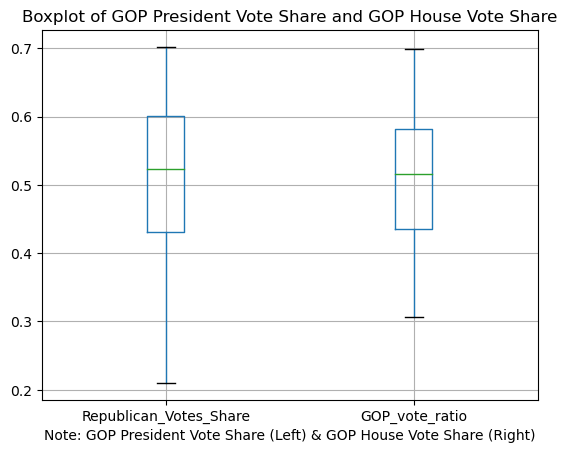

In [44]:
# Draw the box plot
merged_president_house['multi_index'] = list(zip(merged_president_house.GOP_vote_ratio, \
merged_president_house.Republican_Votes_Share))
merged_president_house.set_index('multi_index', inplace=True)
merged_president_house.boxplot()

# Add x-axis labels
plt.xlabel("Note: GOP President Vote Share (Left) & GOP House Vote Share (Right)")

# Add the title
plt.title("Boxplot of GOP President Vote Share and GOP House Vote Share")

# Show the plot
plt.show()

The median of the left box plot represents the Y variable, the Republican's performance in the presidential election, and the mean of the right box plot represent one of the X variable, the Republican Party's overall popularity in terms of House race. Since the mean of the right box plot is higher than that of the left one. We can infer that it is Trump's unpopularity that causes the Republican Party to perform worse than they supposed to have in the 2020 presidential election. 

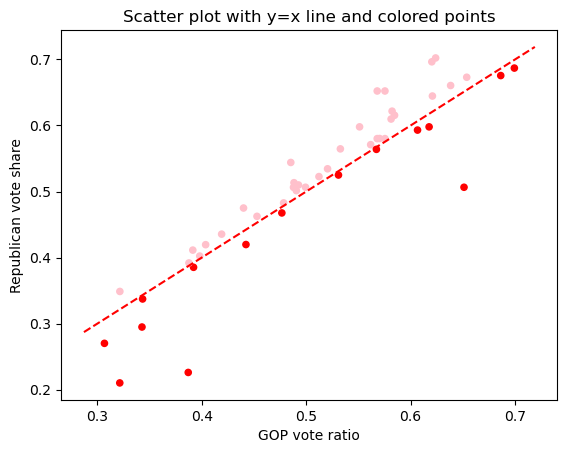

In [45]:

merged_final['color'] = np.where(merged_final['Republican_Votes_Share'] > merged_final['GOP_vote_ratio'], 'pink', 'red')

# create a scatter plot
ax = merged_final.plot.scatter(x='GOP_vote_ratio', y='Republican_Votes_Share', c=merged_final['color'])

# add a line with equation y=x
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color='red', linestyle='--')

# add axis labels and title
plt.xlabel('GOP vote ratio')
plt.ylabel('Republican vote share')
plt.title('Scatter plot with y=x line and colored points')

# show the plot
plt.show()

In this scatter plot, data points under y=x which are in red, represent all counties where the Republican Party performed better in the House race than they did in the presidential election. Their performance in the house represents the Republican party's overall popularity (as the sample size is large enough), which is solely determined by the Republican party itself. However, their performance in the presidential election is the Y variable, determined by the quality of the candidate, Donald Trump, and the popularity of the Republican Party. If the Republicans performed better in most counties than they did in the presidential election, as shown in the scatter plot, then Donald Trump must have dragged down the Republican vote share in the 2020 presidential election.

From the economic perspective, Trump's mishandling of the U.S. economy during the pandemic contribute significantly to the Republicans' defeat in the 2020 presidential election. When the country suffered from the COVID-19 pandemic, which caused widespread job losses and economic uncertainty. The pandemic also result in a significant economic recession in the economy in the first half of 2020, and many Americans felt that the Trump administration's response to the crisis was leading the country in the wrong direction. Furthermore, issues such as income inequality, trade policy, improper foreign policy with allies and trade partners and expensive healthcare also contributed to voters' concerns about the economy and influenced their decision at the ballot box. Ultimately, these economic issues, along with other factors such as the handling of the pandemic, Trump's polarizing politics, and his damage to America's standing and image on the world stage. 

All those negative impacts are mainly caused by the Trump administration, not the establishment Republicans. Also, there is no evident sign that the Republican party's ideology and image becomes less significantly unpopular among Americans. So it is likely that Trump's bad governance and his unpopular image account most for the Republican party's defeat in the 2020 presidential election, which is consistent with out analysis in this investigation.

### Investigation 2 (Representing Republican party popularity by Senate vote share)

In investigation 2, the same applies, but we are going to evaluate one of the X variables, the popularity of the candidate's party, in a different way, based on the vote share of Republicans in the Senate. Then we can find what impact Trump imposed on the Republican party in 2020, by comparing Trump's vote share and Republican Senate candidates' vote share by county, which is the same method we used in investigation 1, but we can reaffirm and prove our findings in investigation 1 using data from Senate in this investigation.

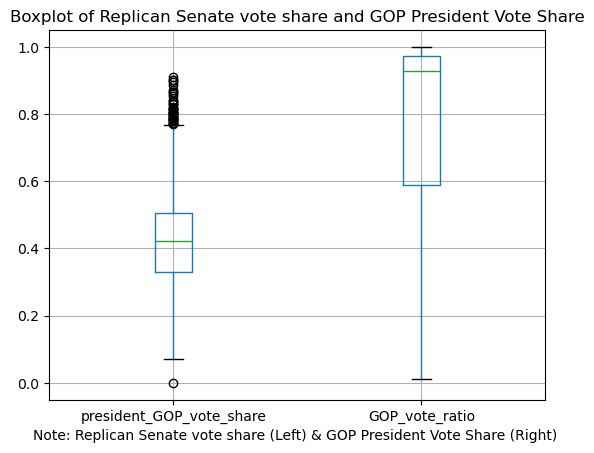

In [46]:
#Draw box plot of Republican_Votes_Share and GOP_vote_ratio
merged_president_senate.boxplot()

# Add x-axis labels
plt.xlabel("Note: Replican Senate vote share (Left) & GOP President Vote Share (Right) ")
plt.title('Boxplot of Replican Senate vote share and GOP President Vote Share')
plt.show()


The median of the left box plot represent the Y variable, Republican's performance in presidential election, the mean of the right box plots represent one of the X variable, the Republican Party's overall popularity in terms of Senate race. Since the mean of right box plot is higher than that of left variable. We can infer that it is Trump's unpopularity that causes the Republican Party performing worse than they supposed to have in the 2020 presidential election. 

In [47]:
#Make the scatter points above the line y = x red and others black
merged_president_senate["color"] = \
np.where(merged_president_senate['GOP_vote_ratio'] >= \
merged_president_senate['president_GOP_vote_share'], "pink", "red")
ax = merged_president_senate.plot(x='GOP_vote_ratio', y='president_GOP_vote_share', kind='scatter', \
c=merged_president_senate["color"])
ax.set_xlabel('Repulican senate candidates vote share by county')
ax.set_ylabel('Republican presidential candidate vote share by county')
plt.title("Repulican presidential candidate vote Share vs. Republican senate candidate vote share by county")

#Add the line y = x to help us infer the result illustrated in the following. 
x = np.linspace(*ax.get_xlim(), num=100)
ax.plot(x, x, color='red', linestyle='-', label='y=x')
ax.legend()



In this scatter plot, data points under y=x which are in red, represent all counties where the Republican Party performed better in the Senate race than they did in the presidential election. Their performance in Senate represents the Republican party's overall popularity (as the sample size is large enough), which is solely determined by the Republican party itself. However, their performance in the presidential election is the Y variable, determined by the quality of the candidate, Donald Trump, and the popularity of the Republican Party. If the Republicans performed better in the most state than they did in the presidential election, as shown in the scatter plot, then Donald Trump must have dragged down the Republican vote share in the 2020 presidential election.

As stated in investigation 1, from the economic perspective, Trump's mishandling of the U.S. economy during the pandemic contribute significantly to the Republicans' defeat in the 2020 presidential election. Plus, there is no substantial evidence that Republican ideology and image are significantly less popular than that of the Democratic party in 2020. Then Trump should take responsibility for the Republican party's loss in the 2020 presidential election.

# Project 2

## The Message

In this project, we are conducting research to find out whether Donald Trump should be held accountable for Republican failure in the 2020 presidential election. According to my analysis in project one, we can draw a preliminary conclusion that Trump did impose negative impact on the Republican. As we see in project 1, Trump is less popular than the the overall level of the congressional Republican candidates, which means he is very likely dragging down the image and performance of the Republicans in 2020. Moreover, we are going to analyse relevant data using maps, so that we can dig into the question from geographical perspective. Furthermore, we can analyse the research question by subgroups to find out more about the research question. In this project, we would divide all the U.S. states into two group, coastal states which are situated by the Atlantic or Pacific, and central states which are all the states other than coastal states. Then we can have a closer look at Trump’s impact on the Republican campaign in the 2020 presidential election, from a geographical perspective.

## Maps and Interpretations

In this section, we are going to compare how did House Republicans and Donald Trump performed both in coastal and central states. Therefore, we could analyze Trump's impact from geographical perspective.

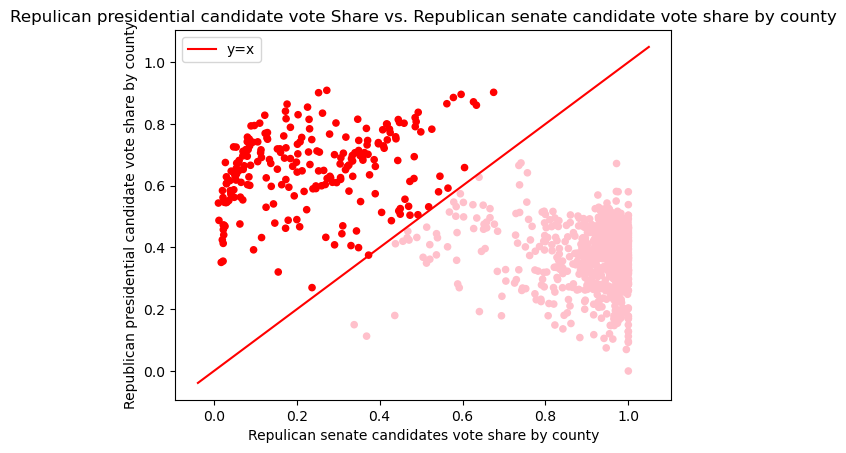

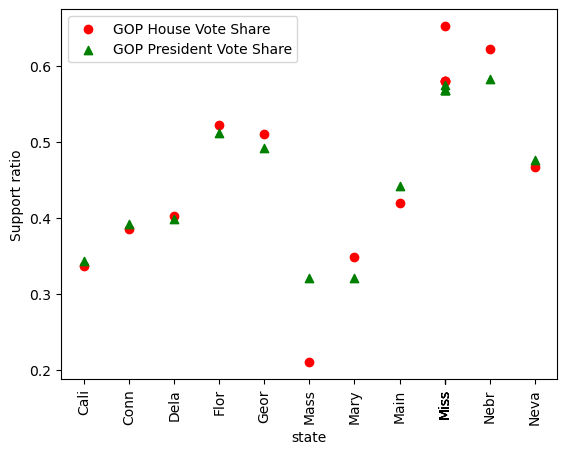

In [48]:
# create figure and axes
fig, ax = plt.subplots()

# plot Republican Votes Share as red circles
ax.scatter(coastal_state['state'], coastal_state['Republican_Votes_Share_x'], color='red', label='GOP House Vote Share')

# plot GOP Vote Ratio as green triangles
ax.scatter(coastal_state['state'], coastal_state['GOP_vote_ratio'], color='green', marker='^', label='GOP President Vote Share')

# set x-axis label and ticks
ax.set_xlabel('state')
ax.set_xticks(coastal_state['state'])
ax.set_xticklabels(coastal_state['state'], rotation=90)

# set y-axis label
ax.set_ylabel('Support ratio')

# set legend
ax.legend()

# show plot
plt.show()

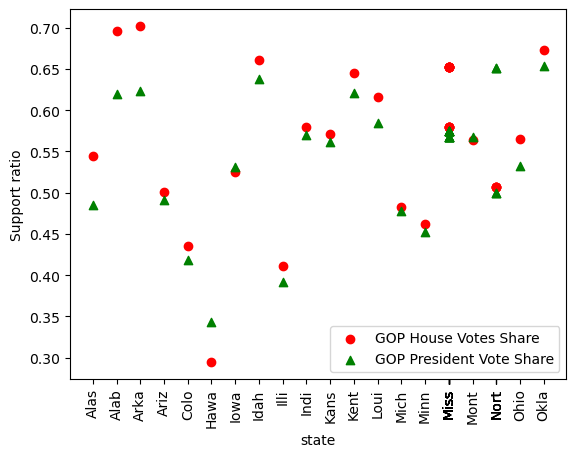

In [49]:
# create figure and axes
fig, ax = plt.subplots()

# plot Republican Votes Share as red circles
ax.scatter(central_state['state'], central_state['Republican_Votes_Share_x'], color='red', label='GOP House Votes Share')

# plot GOP Vote Ratio as green triangles
ax.scatter(central_state['state'], central_state['GOP_vote_ratio'], color='green', marker='^', label='GOP President Vote Share')

# set x-axis label and ticks
ax.set_xlabel('state')
ax.set_xticks(central_state['state'])
ax.set_xticklabels(central_state['state'], rotation=90)

# set y-axis label
ax.set_ylabel('Support ratio')

# set legend
ax.legend()

# show plot
plt.show()

From the plot above, we can see that comparison of and House Republican candidates’ vote share and Trump’s, both in ‘coastal’ states and ‘central’ states, where ‘coastal states’ are those states that are situated by the Atlantic or Pacific, and ‘central states’ are the rest. Trump outperformed House Republican candidates in the majority ‘coastal’ states, but underperformed House Republican candidate in the majority of ‘central’ states. So in general, Trump gained more support in ‘coastal’ states than in ‘central’ states. We do not know the reason behind it. But it is a possibility that people live in East and West coast are more open to Trump’s lifestyle and his attitude towards sex, while people from ‘central’ states where conservative christians take up a large proportion of the population do not perceive Trump is an ideal representative of their values. 

In [50]:
# Read the CSV file into a DataFrame
state_codes = pd.read_csv('/Users/richardhsiao/Documents/ECO225/archive/world_country_and_usa_states_latitude_and_longitude_values.csv')

# Select only the 'usa_state' and 'usa_state_code' columns
state_codes = state_codes[['usa_state', 'usa_state_code']]

# Rename the 'usa_state' column to 'state'
state_codes = state_codes.rename(columns={'usa_state': 'state'})

# Merge the state_codes DataFrame with df_president_county on the 'state' column
df_president_county = df_president_county.merge(state_codes, on='state')

# Compute the percentage of Republican votes
df_president_county['percent_republican'] = df_president_county[('total_votes', 'REP')]  / (df_president_county[('total_votes', 'REP')] + df_president_county[('total_votes', 'DEM')])

# Remove any duplicated columns
df_president_county = df_president_county.loc[:, ~df_president_county.columns.duplicated()]

# Output the final DataFrame
df_president_county.head()

,state,"(state, )","(total_votes, DEM)","(total_votes, REP)","(won, DEM)","(won, REP)",usa_state_code_x,percent_republican,usa_state_code_y
0,Alabama,Alabama,849648,1441168,13,54,AL,0.629107,AL
1,Alaska,Alaska,153405,189892,17,20,AK,0.553142,AK
2,Arizona,Arizona,1672143,1661686,5,10,AZ,0.498432,AZ
3,Arkansas,Arkansas,423932,760647,8,67,AR,0.642124,AR
4,California,California,11109764,6005961,35,23,CA,0.350903,CA


In [51]:
fig = px.choropleth(df_president_county, 
                    locations= 'usa_state_code_x', 
                    color = "percent_republican",
                    locationmode = 'USA-states', 
                    hover_name="state",
                    range_color=[0.4,0.8],
                    color_continuous_scale = ['white','red'],
                    scope="usa",
                    title='2020 USA Election by State')
fig.show()

In [52]:
fig = px.choropleth(merged_for_map, 
                    locations="usa_state_code", 
                    color="Republican_Votes_Share_x", 
                    locationmode = 'USA-states', 
                    hover_name="state",
                    range_color=[0.4,0.8],
                    scope="usa",
                    title='2020 USA Election: Republican House Votes Share in 2020',
                    color_continuous_scale=px.colors.sequential.Reds, # Change the color scale here
                    color_continuous_midpoint=0.6, # Set midpoint of the color scale
                    labels={'Republican_Votes_Share_x': 'Republican Votes Share'}) # Rename the color bar title in the legend

fig.show()


From the two maps above, the vote share of Donald Trump and House Republican candidates in all the U.S. states are presented. Therefore, we can compare their vote share and analyse Trump’s impact more intuitively from a geographical perspective. In the map. We can see that in the two maps we plotted, House Republican candidates performed better than Donald Trump in most of the U.S. states, which means the general popularity of the Republicans is better than that of Trump. This reaffirms our previous conclusion that Republican Party’s ideology and image made the Republicans lose the White House, it is Trump who dragged down the Republican Party. This could attribute to several factors. First, Donald Trump’s overall popularity is not that good due to his bad governance and terrible policies with regard to COVID-19, trade, diplomacy, etc. Second, Trump has done certain things that really pissed off many people in certain states. For example, he has publicly humiliated Arizona’s former U.S. Senator, John Sidney McCain III, who is very well-regarded by the people in Arizona. His unfriendly attitude to people of colour also caused him to lose support in states where people of colour take up a significant proportion of the population, like Florida, Georgia, Colorado, etc. Third, though he is a Republican, his values and lifestyle completed does not meet the expectation of conservative Christians, a group that takes up a huge percentage of Republican voters. 


# Project 3

## Potential Data to Scrape

For the third project, we incorporated statistical data on per capita income for all United States counties, which we obtained from the website https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income. I combined this dataset with information on the Republican vote share by county. It is a panel data that describes the per capita income of all U.S. counties during a given period of time. I then classified all US counties into two distinct categories based on their per capita income in relation to the national average: 'rich counties' with per capita income surpassing the national average, and 'poor counties' with per capita income below the national average, and integrated them. This enabled us to examine whether Trump's popularity, relative to that of the Republican Party, was associated with the socioeconomic status of the county. Through a comparison of Donald Trump's performance with that of the Republicans in both rich and poor counties, we analyzed his influence from a socioeconomic perspective, thus enriching our report and find out the causality behind Trump dragging down the Republican Party. Ultimately, we were able to find out whether the Trump’s unpopularity in rich or poor counties dragged down the Republican party in the 2020 presidential election.

## Potential Challenges

Various obstacles may arise that require attention during the process of scraping data. In the current investigation, the data I scraped contains the statistics for some US overseas territory, like Guam and Nothern Mariana Island. It could be tedius and troublesome to drop all the data that I do not need. As you know, there are so many counties in the United States, it could be difficult for me to locate and eliminate the data that I do not wish to include. However, It is good that I do not need run the program regularly, as all data concerning the 2020 presidential election is constant. Despite the researcher's ability to obtain the requisite data from the source, there exists a necessity to establish a methodology for the seamless integration of the primary data and the web-scraped data.

## Scraping Data from a Website

In [53]:
## Web scraping the data of income per capita of all US counties from Wikipedia

url = "https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income"

html = requests.get(url).content
soup = BeautifulSoup(html)

table = soup.find_all("table")[2] # select the third table on the page
Income_per_capita = pd.read_html(str(table))[0] # convert the table to a pandas dataframe
Income_per_capita = Income_per_capita.rename(columns={'County or county-equivalent': 'county'})
Income_per_capita.head()

,Rank,county,"State, federal district or territory",Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,New York County,New York,"$76,592","$69,659","$86,553",1628706.0,759460.0
1,2,Arlington,Virginia,"$62,018","$103,208","$139,244",214861.0,94454.0
2,3,Falls Church City,Virginia,"$59,088","$120,000","$152,857",12731.0,5020.0
3,4,Marin,California,"$56,791","$90,839","$117,357",254643.0,102912.0
4,5,Santa Clara,California,"$56,248","$124,055","$124,055",1927852.0,640215.0


This is the data of the per capita income of U.S. counties and territories scrapped from Wikipedia, as we mentioned before. 

## Merging the Scraped Dataset

In [54]:
senate_GOP_vote_ratio.reset_index()

,county,GOP_vote_ratio
0,Abington,0.982816
1,Acadia Parish,0.097628
2,Acton,0.808411
3,Acworth,0.953782
4,Adams,0.959717
...,...,...
987,Yazoo County,0.982089
988,York,0.914235
989,Zapata County,0.934447
990,Zavala County,0.905217


In [55]:
#Merge with senate_county_candidate on county.
new_merge_1 = pd.merge(senate_GOP_vote_ratio, Income_per_capita, on='county', how='inner')
new_merge_1

,county,GOP_vote_ratio,Rank,"State, federal district or territory",Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,Adams,0.959717,248,North Dakota,"$31,502","$47,798","$65,859",2328.0,1101.0
1,Adams,0.959717,600,Pennsylvania,"$27,284","$59,492","$69,551",101496.0,38141.0
2,Adams,0.959717,929,Nebraska,"$25,571","$49,440","$65,286",31367.0,12578.0
3,Adams,0.959717,1229,Illinois,"$24,217","$45,073","$58,992",67152.0,26912.0
4,Adams,0.959717,1233,Colorado,"$24,195","$56,270","$64,611",452030.0,152803.0
...,...,...,...,...,...,...,...,...,...
402,York,0.914235,95,Virginia,"$36,373","$82,073","$95,392",65762.0,24071.0
403,York,0.914235,390,Maine,"$29,125","$57,348","$70,642",198220.0,81293.0
404,York,0.914235,470,Nebraska,"$28,207","$49,633","$63,940",13762.0,5501.0
405,York,0.914235,480,Pennsylvania,"$28,132","$58,745","$70,001",436339.0,167592.0


In [56]:
#Merge with presidential vote share on county.
new_merge_2 = pd.merge(president_GOP_votes_county_ratio, new_merge_1, on='county')
new_merge_2

,county,president_GOP_vote_share,GOP_vote_ratio,Rank,"State, federal district or territory",Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,Adams,0.321549,0.959717,248,North Dakota,"$31,502","$47,798","$65,859",2328.0,1101.0
1,Adams,0.321549,0.959717,600,Pennsylvania,"$27,284","$59,492","$69,551",101496.0,38141.0
2,Adams,0.321549,0.959717,929,Nebraska,"$25,571","$49,440","$65,286",31367.0,12578.0
3,Adams,0.321549,0.959717,1229,Illinois,"$24,217","$45,073","$58,992",67152.0,26912.0
4,Adams,0.321549,0.959717,1233,Colorado,"$24,195","$56,270","$64,611",452030.0,152803.0
...,...,...,...,...,...,...,...,...,...,...
402,York,0.347070,0.914235,95,Virginia,"$36,373","$82,073","$95,392",65762.0,24071.0
403,York,0.347070,0.914235,390,Maine,"$29,125","$57,348","$70,642",198220.0,81293.0
404,York,0.347070,0.914235,470,Nebraska,"$28,207","$49,633","$63,940",13762.0,5501.0
405,York,0.347070,0.914235,480,Pennsylvania,"$28,132","$58,745","$70,001",436339.0,167592.0


In [57]:
new_merge_2['Per capitaincome'] = new_merge_2['Per capitaincome'].astype(str).str.replace(',', '').str.replace('$', '', regex=False).astype(float)
new_merge_2['Per capitaincome']

0      31502.0
1      27284.0
2      25571.0
3      24217.0
4      24195.0
        ...   
402    36373.0
403    29125.0
404    28207.0
405    28132.0
406    26553.0
Name: Per capitaincome, Length: 407, dtype: float64

In [139]:
#Merging the per capita income, presidential vote share and senate vote share of rich counties into one table.
rich_counties = new_merge_2.loc[new_merge_2['Per capitaincome'] > 31000]
rich_counties.head()

,county,president_GOP_vote_share,GOP_vote_ratio,Rank,"State, federal district or territory",Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,Adams,0.321549,0.959717,248,North Dakota,31502.0,"$47,798","$65,859",2328.0,1101.0
12,Albany,0.429727,0.942197,210,New York,32328.0,"$59,394","$81,846",305279.0,122700.0
16,Arlington,0.162871,0.973079,2,Virginia,62018.0,"$103,208","$139,244",214861.0,94454.0
19,Barnstable,0.402294,0.986998,102,Massachusetts,36142.0,"$60,526","$76,311",215449.0,95398.0
29,Bristol,0.438653,0.798210,52,Rhode Island,38893.0,"$71,238","$93,131",49426.0,19174.0


In [140]:
#Merging the per capita income, presidential vote share and senate vote share of poor counties into one table.

poor_counties = new_merge_2.loc[new_merge_2['Per capitaincome'] <= 31000]
poor_counties.head()

,county,president_GOP_vote_share,GOP_vote_ratio,Rank,"State, federal district or territory",Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
1,Adams,0.321549,0.959717,600,Pennsylvania,27284.0,"$59,492","$69,551",101496.0,38141.0
2,Adams,0.321549,0.959717,929,Nebraska,25571.0,"$49,440","$65,286",31367.0,12578.0
3,Adams,0.321549,0.959717,1229,Illinois,24217.0,"$45,073","$58,992",67152.0,26912.0
4,Adams,0.321549,0.959717,1233,Colorado,24195.0,"$56,270","$64,611",452030.0,152803.0
5,Adams,0.321549,0.959717,1359,Iowa,23707.0,"$45,871","$56,552",3973.0,1745.0


## Visualizing the Scraped Dataset

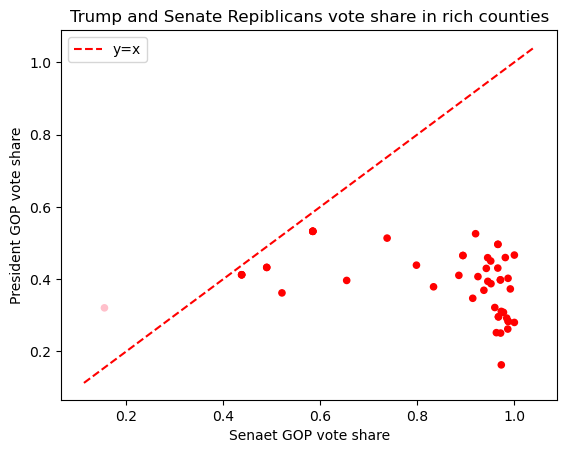

In [141]:
#Draw the scatter plot of democrats support and democratic president support over poor counties
rich_counties = rich_counties[['GOP_vote_ratio', 'president_GOP_vote_share']].copy()
rich_counties['color'] = np.where(rich_counties['GOP_vote_ratio'] >= rich_counties['president_GOP_vote_share'], \
                                'red', 'pink')

ax = rich_counties.plot(x='GOP_vote_ratio', y='president_GOP_vote_share', kind='scatter', c = rich_counties['color'])
ax.set_xlabel('Senaet GOP vote share')
ax.set_ylabel('President GOP vote share')
plt.title('Trump and Senate Repiblicans vote share in rich counties')

# Add the line y = x to help us infer the result illustrated in the following.
x = np.linspace(*ax.get_xlim(), num=100)
ax.plot(x, x, color='red', linestyle='--', label='y=x')

plt.legend()
plt.show()

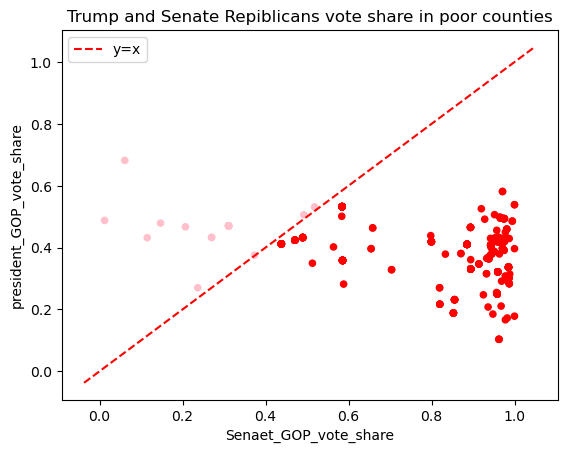

In [142]:
#Draw the scatter plot of democrats support and democratic president support over poor counties
poor_counties = poor_counties[['GOP_vote_ratio', 'president_GOP_vote_share']].copy()
poor_counties['color'] = np.where(poor_counties['GOP_vote_ratio'] >= poor_counties['president_GOP_vote_share'], \
                                'red', 'pink')

ax = poor_counties.plot(x='GOP_vote_ratio', y='president_GOP_vote_share', kind='scatter', c = poor_counties['color'])
ax.set_xlabel('Senaet_GOP_vote_share')
ax.set_ylabel('president_GOP_vote_share')
plt.title('Trump and Senate Repiblicans vote share in poor counties')

# Add the line y = x to help us infer the result illustrated in the following.
x = np.linspace(*ax.get_xlim(), num=100)
ax.plot(x, x, color='red', linestyle='--', label='y=x')

plt.legend()
plt.show()

The first scatter plot exhibits all counties with above-average per capita income, where points located above the y=x line indicate counties in which Trump received a higher percentage of votes than Senate Republicans, and vice versa. The outcomes reveal that, in rich counties,Trump's performance was worse than that of other Republican Senate candidates. Moreover, the subsequent scatter plot includes all counties with below-average per capita income, where points positioned above the y=x line represent counties in which Trump's vote share exceeded that of Senate Republicans. The findings suggest that Trump's performance was less favourable than Senate Republicans in poor counties. So Trump dragged down the Republicans both in rich and poor counties, but he imposed more negative impact among low-income voters for the Republicans.

One possible economic explanation for this phenomenon is that Trump's campaign focused more on issues that resonated with low-income voters, such as protectionist trade policies and anti-immigration measures. These issues may have been particularly salient in areas that have experienced significant economic dislocation, such as areas that have seen job losses due to outsourcing or automation.

In contrast, in wealthier counties, voters may have been more focused on other issues, such as tax policy and national security. Trump's unconventional campaign style, controversial statements, and unpredictable behavior may have alienated some of these voters, leading them to vote for other Republican candidates instead.

Overall, these findings suggest that Trump's candidacy had a mixed impact on the Republican Party. While he was able to mobilize support among some low-income voters, his divisive rhetoric and unconventional campaign style may have cost the party support among more affluent voters.

## Adding a New Dataset

This part aims to analyze whether the hypothesis that Donald Trump dragged down the Republicans because he is less popular among christian voters is true. So we introduced the data of weekly church attendence of US states from Wikipedia to find out. The states are divided into two groups - more Christian and less Christian - based on their weekly church attendance rates. The purpose of this is to compare the popularity of Senate Republicans and Donald Trump and determine if Trump had a negative impact on the Republican Party's performance among Christian voters in the 2020 presidential election.

In [143]:
#Web scraping the data of US church attendence from wiki

url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_religiosity#U.S._states_and_Washington,_D.C"

html = requests.get(url).content
soup = BeautifulSoup(html)

table = soup.find_all("table")[4] 
church_attendence_before = pd.read_html(str(table))[0] # convert the table to a pandas dataframe
church_attendence_before = church_attendence_before.rename(columns={'State':'state'})
church_attendence_before.head()

,Rank,state,Percent
0,1,Utah,51%
1,2,Mississippi,47%
2,3,Alabama,46%
3,4,Louisiana,46%
4,5,Arkansas,45%


In [144]:
#Slice two table so that they can be merged by common column state
house_GOP_state_ratio_slice= house_GOP_state_ratio
house_GOP_state_ratio_slice = house_GOP_state_ratio_slice.reset_index()
house_GOP_state_ratio_slice['state'] = house_GOP_state_ratio_slice['state'].str.slice(stop=4)
house_GOP_state_ratio_slice.head()

church_attendence_slice = church_attendence_before
church_attendence_slice['state'] = church_attendence_slice['state'].str.slice(stop=4)
church_attendence_slice.head()

,Rank,state,Percent
0,1,Utah,51%
1,2,Miss,47%
2,3,Alab,46%
3,4,Loui,46%
4,5,Arka,45%


In [145]:
christian_merge = pd.merge(merged_president_house, church_attendence_slice, on='state')
christian_merge.head()

,state,Republican_Votes_Share,GOP_vote_ratio,Rank,Percent
0,Alab,0.696442,0.620310,3,46%
1,Alas,0.544012,0.485228,41,26%
2,Ariz,0.501344,0.490560,21,33%
3,Arka,0.702280,0.623957,5,45%
4,Cali,0.337254,0.343278,37,28%


In [146]:
#We need to convert string percent into numeric so that we can filter 
# Check data type of 'Percent' column
print(church_attendence_before['Percent'].dtype)

# Convert non-string values to string and remove '%' symbol
church_attendence = church_attendence_before.copy() # make a copy to avoid modifying the original dataframe
church_attendence['Percent'] = church_attendence['Percent'].astype(str).str.replace('%', '').astype(float)
church_attendence.head()

object


,Rank,state,Percent
0,1,Utah,51.0
1,2,Miss,47.0
2,3,Alab,46.0
3,4,Loui,46.0
4,5,Arka,45.0


In [66]:
#Slice two table so that they can be merged by common column state
house_GOP_state_ratio_slice= house_GOP_state_ratio
house_GOP_state_ratio_slice = house_GOP_state_ratio_slice.reset_index()
house_GOP_state_ratio_slice['state'] = house_GOP_state_ratio_slice['state'].str.slice(stop=4)
house_GOP_state_ratio_slice

church_attendence_slice = church_attendence
church_attendence_slice['state'] = church_attendence_slice['state'].str.slice(stop=4)
church_attendence_slice.head()

,Rank,state,Percent
0,1,Utah,51.0
1,2,Miss,47.0
2,3,Alab,46.0
3,4,Loui,46.0
4,5,Arka,45.0


In [67]:
christian_merge = pd.merge(merged_president_house, church_attendence_slice, on='state')
christian_merge.head()

,state,Republican_Votes_Share,GOP_vote_ratio,Rank,Percent
0,Alab,0.696442,0.620310,3,46.0
1,Alas,0.544012,0.485228,41,26.0
2,Ariz,0.501344,0.490560,21,33.0
3,Arka,0.702280,0.623957,5,45.0
4,Cali,0.337254,0.343278,37,28.0


In [68]:
church_attendence['Percent'].median()

32.0

In [69]:
more_christian_states = christian_merge.loc[christian_merge['Percent'] >= 35]
more_christian_states.head()

,state,Republican_Votes_Share,GOP_vote_ratio,Rank,Percent
0,Alab,0.696442,0.620310,3,46.0
3,Arka,0.702280,0.623957,5,45.0
7,Dela,0.402220,0.398014,17,35.0
9,Geor,0.509918,0.492596,10,39.0
13,Indi,0.580269,0.570306,15,35.0


In [70]:
less_christian_states = christian_merge.loc[christian_merge['Percent'] < 35]
less_christian_states.head()

,state,Republican_Votes_Share,GOP_vote_ratio,Rank,Percent
1,Alas,0.544012,0.485228,41,26.0
2,Ariz,0.501344,0.490560,21,33.0
4,Cali,0.337254,0.343278,37,28.0
5,Colo,0.435472,0.418983,43,25.0
6,Conn,0.385215,0.392095,42,25.0


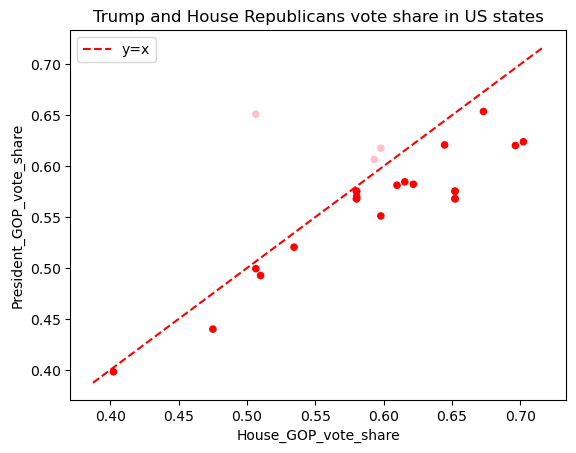

In [71]:
#Draw the first scatter plot for more_christian states
more_christian_states = more_christian_states[['Republican_Votes_Share', 'GOP_vote_ratio']].copy()
more_christian_states['color'] = np.where(more_christian_states['Republican_Votes_Share'] >= more_christian_states['GOP_vote_ratio'], \
                                'red', 'pink')

ax = more_christian_states.plot(x='Republican_Votes_Share', y='GOP_vote_ratio', kind='scatter', c = more_christian_states['color'])
ax.set_xlabel('House_GOP_vote_share')
ax.set_ylabel('President_GOP_vote_share')
plt.title('Trump and House Republicans vote share in US states')

# Add the line y = x to help us infer the result illustrated in the following.
x = np.linspace(*ax.get_xlim(), num=100)
ax.plot(x, x, color='red', linestyle='--', label='y=x')

plt.legend()
plt.show()

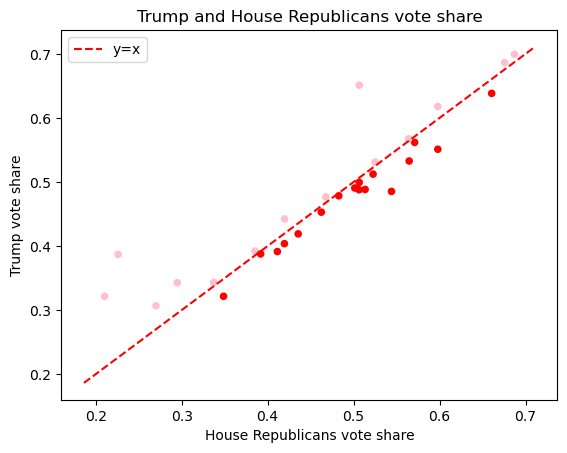

In [72]:
#Draw the first scatter plot for less_christian states
less_christian_states = less_christian_states[['Republican_Votes_Share', 'GOP_vote_ratio']].copy()
less_christian_states['color'] = np.where(less_christian_states['Republican_Votes_Share'] >= less_christian_states['GOP_vote_ratio'], \
                                'red', 'pink')

ab = less_christian_states.plot(x='Republican_Votes_Share', y='GOP_vote_ratio', kind='scatter', c = less_christian_states['color'])
ab.set_xlabel('House Republicans vote share')
ab.set_ylabel('Trump vote share')
plt.title('Trump and House Republicans vote share')

# Add the line y = x to help us infer the result illustrated in the following.
x = np.linspace(*ab.get_xlim(), num=100)
ab.plot(x, x, color='red', linestyle='--', label='y=x')

plt.legend()
plt.show()

The states with higher weekly church attendance than the median are classified as "more christian" while those with lower attendance are classified as “less christian”. Two scatter plots are used to show the relationship between Trump's vote share and Senate Republicans' vote share in both types of states. The first plot represents more Christian states, with data points above the y=x line indicating that Trump outperformed Senate Republicans, and those below indicating the opposite. The second plot shows less Christian states, with data points above the y=x line indicating that Trump outperformed Senate Republicans, and those below indicating the opposite.

The results indicate that Senate Republicans were more popular than Trump in most more Christian states, suggesting that Trump was less favorable than the Republican Party in these states. Moreover, in most less Christian states,Trump is also less popular then average Republicans. So Christianity did not make any significant difference for the Republicans in the 2020 presidential election.

There is one possible economic explanation. It is conservative Christians voting with Republicans regardless of the candidate that Trump's vote share does not appear to be related to weekly church attendence.

## Final Project

### OLS Regression

#### First Regression:
**`Republican President Vote Share  = (-0.342) * Republican Senate Vote Share + 0.697`**

The regression model Republican Presidential Vote Share = 0.697 - 0.342 *(Republican Senate Vote Share) shows that there is a negative relationship between Republican presidential vote share and Republican Senate vote share. In other words, counties that voted more Republican for Senate also tended to vote less Republican for president. This is likely because there is a certain amount of overlap between the two groups of voters, and those who are more likely to vote Republican for Senate are also more likely to vote Republican for president. However, it is also possible that there are other factors at play, such as the quality of the candidates or the issues that were at stake in the election.

The coefficient of -0.342 indicates that for every 1% increase in Republican Senate vote share, there is a 0.342% decrease in Republican presidential vote share. This means that a county with a Republican Senate vote share of 50% would be expected to have a Republican presidential vote share of 69.7%, while a county with a Republican Senate vote share of 100% would be expected to have a Republican presidential vote share of 35.5%.

It is quite counterintuitive. But it is important to note that this is just a correlation, and it does not necessarily mean that one variable causes the other. It is possible that there is a third variable that is causing both Republican Senate vote share and Republican presidential vote share to increase or decrease. For example, it is possible that counties with a higher proportion of white voters tend to vote more Republican for both Senate and president.

One possible  economic explanation for the negative relationship between Republican presidential vote share and Republican Senate vote share is that voters are more likely to support candidates who they believe will support their economic interests. During Trump administration, Donald Trump has been associated with policies that are more favorable to businesses and wealthy individuals, while the Democratic Party and Joe Biden has been associated with policies that are more favorable to workers and low-income individuals. As a result, voters who are concerned about their economic well-being may be more likely to vote for Democratic candidates for president, even if they vote for Republican candidates for Senate.


In [147]:
regression = merged_president_senate
regression.head()

,president_GOP_vote_share,GOP_vote_ratio
county,,
Abington,0.438509,0.982816
Acadia Parish,0.794934,0.097628
Acton,0.218531,0.808411
Acworth,0.472759,0.953782
Adams,0.321549,0.959717


In [148]:
regression = regression.copy()  # create a copy of the DataFrame
regression.loc[:, 'intercept'] = [1] * len(regression)  # use .loc to modify the copy

In [149]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer  # import the Stargazer module
from IPython.core.display import HTML

reg1 = sm.OLS(endog=regression['president_GOP_vote_share'], exog=regression[['GOP_vote_ratio', 'intercept']],
             missing = 'drop')
res1 = reg1.fit()


stargazer = Stargazer([res1])
HTML(stargazer.render_html())

#### Second Regression:
**`Republican President Vote Share = (0.710) + (-0.355) * Republican Senate Vote Share + (0.231) *(Republican Senate Vote Share* poor_counties)+(-0.226) * poor_counties`**

The regression model shows that there is a positive relationship between Republican presidential vote share and Republican Senate vote share, and that this relationship is stronger in counties with a higher proportion of poor residents. In other words, counties that voted more Republican for Senate also tended to vote more Republican for president, and this tendency was even stronger in counties with a higher proportion of poor residents.

A very likely economic explantion is that poor residents are more likely to be affected by economic issues, and they may be more likely to support candidates who they believe will support their economic interests. During the Trump administration, Donald Trump has been associated with policies that are more favorable to businesses and wealthy individuals, while the Democratic Party has been associated with policies that are more favorable to workers and low-income individuals. As a result, poor residents who are concerned about their economic well-being may be more likely to vote for Democratic candidates for president, even if they vote for Republican candidates for Senate.

The coefficient of 0.442 indicates that for every 1% increase in Republican Senate vote share, there is a 0.442% increase in Republican presidential vote share. This means that a county with a Republican Senate vote share of 50% would be expected to have a Republican presidential vote share of 71.0%, while a county with a Republican Senate vote share of 100% would be expected to have a Republican presidential vote share of 94.2%.

The coefficient of 0.231 indicates that for every 1% increase in the proportion of poor residents, there is a 0.231% increase in the relationship between Republican presidential vote share and Republican Senate vote share. This means that a county with a 10% proportion of poor residents would be expected to have a relationship between Republican presidential vote share and Republican Senate vote share that is 2.31% stronger than a county with a 0% proportion of poor residents.

The coefficient of -0.226 indicates that for every 1% increase in the proportion of poor residents, there is a 0.226% decrease in Republican presidential vote share. This means that a county with a 10% proportion of poor residents would be expected to have a Republican presidential vote share that is 2.26% lower than a county with a 0% proportion of poor residents.



In [76]:
regression = regression.reset_index()

In [84]:
poor_counties.head()

,county,president_GOP_vote_share,GOP_vote_ratio,Rank,"State, federal district or territory",Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
1,Adams,0.321549,0.959717,600,Pennsylvania,27284.0,"$59,492","$69,551",101496.0,38141.0
2,Adams,0.321549,0.959717,929,Nebraska,25571.0,"$49,440","$65,286",31367.0,12578.0
3,Adams,0.321549,0.959717,1229,Illinois,24217.0,"$45,073","$58,992",67152.0,26912.0
4,Adams,0.321549,0.959717,1233,Colorado,24195.0,"$56,270","$64,611",452030.0,152803.0
5,Adams,0.321549,0.959717,1359,Iowa,23707.0,"$45,871","$56,552",3973.0,1745.0


In [85]:
import statsmodels.api as sm

regression=regression.copy()
regression['poor_counties'] = regression['county'].isin(poor_counties['county']).astype(int)
regression['interaction'] = regression['poor_counties'] * regression['GOP_vote_ratio']

# add a constant to the exogenous variables
exog = sm.add_constant(regression[['poor_counties', 'GOP_vote_ratio', 'interaction']])

# run the regression with the dummy variable included
reg1 = sm.OLS(endog=regression['president_GOP_vote_share'], exog=exog, missing='drop')
res1 = reg1.fit()

stargazer = Stargazer([res1])
HTML(stargazer.render_html())



#### Third Regression:
**`Republican President Vote Share = (0.719) + (-0.376)* Republican Senate Vote Share + (0.045) *(Republican Senate Vote Share * well_educated)+(-0.027) * well_educated`**

The regression model indicates that there is a negative relationship between Republican presidential vote share and Republican Senate vote share, and that this relationship is weaker in counties with a higher proportion of well-educated residents. In other words, counties that voted more Republican for Senate also tended to vote less Republican for president, and this tendency was even weaker in counties with a higher proportion of well-educated residents.

This is likely because well-educated residents are more likely to be exposed to different viewpoints and to have a better understanding of the issues. They may also be more likely to support candidates who they believe will support their economic interests. In recent years, the Republican Party has been associated with policies that are more favorable to businesses and wealthy individuals, while the Democratic Party has been associated with policies that are more favorable to workers and low-income individuals. As a result, well-educated residents who are concerned about their economic well-being may be more likely to vote for Democratic candidates for president, even if they vote for Republican candidates for Senate.

The coefficient of -0.376 indicates that for every 1% increase in Republican Senate vote share, there is a 0.376% decrease in Republican presidential vote share. This means that a county with a Republican Senate vote share of 50% would be expected to have a Republican presidential vote share of 62.4%, while a county with a Republican Senate vote share of 100% would be expected to have a Republican presidential vote share of 37.6%.

The coefficient of -0.045 indicates that for every 1% increase in the proportion of well-educated residents, there is a 0.045% decrease in the relationship between Republican presidential vote share and Republican Senate vote share. This means that a county with a 10% proportion of well-educated residents would be expected to have a relationship between Republican presidential vote share and Republican Senate vote share that is 0.45% weaker than a county with a 0% proportion of well-educated residents.

The coefficient of -0.027 indicates that for every 1% increase in the proportion of well-educated residents, there is a 0.027% decrease in Republican presidential vote share. This means that a county with a 10% proportion of well-educated residents would be expected to have a Republican presidential vote share that is 2.7% lower than a county with a 0% proportion of well-educated residents.


In [86]:
education = pd.read_csv('/Users/richardhsiao/Desktop/Education.csv').dropna()
education.head()

,Area name,"Percent of adults with a bachelor's degree or higher, 2017-21"
0,Alabama,26.7
1,Autauga County,28.1
2,Baldwin County,32.5
3,Barbour County,11.2
4,Bibb County,11.9


In [87]:
education["Percent of adults with a bachelor's degree or higher, 2017-21"].median()

20.9

In [88]:
well_educated = education.loc[education["Percent of adults with a bachelor's degree or higher, 2017-21"] >=20.9]
well_educated

,Area name,"Percent of adults with a bachelor's degree or higher, 2017-21"
0,Alabama,26.7
1,Autauga County,28.1
2,Baldwin County,32.5
16,Coffee County,22.7
26,Elmore County,24.6
...,...,...
3277,Utuado Municipio,21.1
3278,Vega Alta Municipio,22.0
3279,Vega Baja Municipio,22.7
3281,Villalba Municipio,21.5


In [89]:
import statsmodels.api as sm

regression['well_educated'] = (education['Area name'].isin(well_educated['Area name']).astype(int))
regression['interaction'] = regression['well_educated'] * regression['GOP_vote_ratio']
exog = sm.add_constant(regression[['well_educated', 'GOP_vote_ratio', 'interaction']])
reg1 = sm.OLS(endog=regression['president_GOP_vote_share'], exog=exog, missing='drop')
reg1 = reg1.fit()
stargazer = Stargazer([reg1])
HTML(stargazer.render_html())

#### Fourth Regression:
**`Republican President Vote Share  = (0.699) + (-0.343) * Republican Senate Vote Share + (0.002) *(Republican Senate Vote Share * high_employed)+(-0.006) * high_employed`**

The regression model indicates that there is a negative relationship between Republican presidential vote share and Republican Senate vote share, and that this relationship is weaker in counties with a higher proportion of high-employed residents. In other words, counties that voted more Republican for Senate also tended to vote less Republican for president, and this tendency was even weaker in counties with a higher proportion of high-employed residents.

One possible economic explanation is that high-employed residents, no matter Republicans or Democratics, are generally attracted to Donald Trump. Though Trump 's tax and economic policies are more in favour of wealthier individuals, but many high-skilled and richer Republican voters think that the establishment Republican could better represent them, even a moderate Democrat like Joe Biden is cloer to their expectation than Trump.

The coefficient of -0.343 indicates that for every 1% increase in Republican Senate vote share, there is a 0.343% decrease in Republican presidential vote share. This means that a county with a Republican Senate vote share of 50% would be expected to have a Republican presidential vote share of 65.7%, while a county with a Republican Senate vote share of 100% would be expected to have a Republican presidential vote share of 35.7%.

The coefficient of -0.002 indicates that for every 1% increase in the proportion of high-employed residents, there is a 0.002% decrease in the relationship between Republican presidential vote share and Republican Senate vote share. This means that a county with a 10% proportion of high-employed residents would be expected to have a relationship between Republican presidential vote share and Republican Senate vote share that is 0.2% weaker than a county with a 0% proportion of high-employed residents.

The coefficient of -0.006 indicates that for every 1% increase in the proportion of high-employed residents, there is a 0.006% decrease in Republican presidential vote share. This means that a county with a 10% proportion of high-employed residents would be expected to have a Republican presidential vote share that is 0.6% lower than a county with a 0% proportion of high-employed residents.


In [90]:
unemployment = pd.read_csv("/Users/richardhsiao/Desktop/Unemployment.csv").dropna()
unemployment

,Area_name,Unemployment_rate_2020
0,Alabama,6.5
1,"Autauga County, AL",5.4
2,"Baldwin County, AL",6.2
3,"Barbour County, AL",7.8
4,"Bibb County, AL",7.3
...,...,...
3192,"Sweetwater County, WY",7.3
3193,"Teton County, WY",5.9
3194,"Uinta County, WY",6.3
3195,"Washakie County, WY",5.2


In [91]:
unemployment['Unemployment_rate_2020'].median()

6.6

In [163]:
regression = regression.copy()  # create a copy of the DataFrame
regression.loc[:, 'intercept'] = [1] * len(regression)  # use .loc to modify the copy

In [173]:
high_employed = unemployment.loc[unemployment['Unemployment_rate_2020'] >= 6.6].dropna()
high_employed

,Area_name,Unemployment_rate_2020
3,"Barbour County, AL",7.8
4,"Bibb County, AL",7.3
7,"Butler County, AL",9.6
8,"Calhoun County, AL",7.8
9,"Chambers County, AL",7.5
...,...,...
3172,"Wood County, WI",6.7
3176,"Campbell County, WY",6.8
3186,"Natrona County, WY",7.7
3191,"Sublette County, WY",7.2


In [210]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
import numpy as np



# Remove any observations with missing values
regression = regression.dropna()

# Create a new column indicating if the area has high employment
regression['high_employed'] = (unemployment['Area_name'].isin(high_employed['Area_name'])).astype(int)

# Create an interaction term between high_employed and GOP_vote_ratio
regression['interaction'] = regression['high_employed'] * regression['GOP_vote_ratio']

# Specify the explanatory variables for the regression
exog_vars = ['high_employed', 'GOP_vote_ratio', 'interaction']

# Add a constant term to the explanatory variables
exog = sm.add_constant(regression[exog_vars])

# Fit the regression model
endog_var = 'president_GOP_vote_share'
reg1 = sm.OLS(endog=regression[endog_var], exog=exog, missing='drop')
reg1_fit = reg1.fit()

# Display the regression results using Stargazer
stargazer = Stargazer([reg1_fit])
stargazer.covariate_order(['const'] + exog_vars)
HTML(stargazer.render_html())


ValueError: zero-size array to reduction operation maximum which has no identity

### Machine Learning and Regression Tree

**`president_GOP_vote_share = (0.719) + (-0.376)*GOP_vote_ratio + (0.045) *(GOP_vote_ratio * well_educated)+(-0.027) * well_educated`**

In [ ]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
regression['GOP_vote_ratio*well_educated'] = regression['GOP_vote_ratio'] * regression['well_educated']
regression

In [ ]:
regression

In [ ]:
# Drop any rows with missing values
regression = regression.dropna()

# Define the target variable as 'biden_vote_share_county'
# Define the predictor variables as 'dem_ratio_county' and 'rich_county'
y = regression['president_GOP_vote_share']
X = regression[['GOP_vote_ratio']]

# Create a Decision Tree Regressor object with a maximum depth of 3
tree_reg = DecisionTreeRegressor(max_depth=3)

# Fit the decision tree model using the predictor variables and target variable
tree_reg.fit(X, y)

# Plot the decision tree model
plt.figure(figsize=(25,20))
plot_tree(tree_reg, feature_names=X.columns, filled=True)
plt.show()

This regression tree is a machine learning model that can be used to predict Trump's vote share in a county based on Republican Senate vote share (GOP_Ratio_County). The tree is built by splitting the data into smaller and smaller subsets based on the value of GOP_Ratio_County. The splitting continues until each subset contains only a single data point. The predicted Trump vote share for each data point is then calculated based on the values of the other variables in the data set.

The regression tree in this report is built using the following steps:

First, The data is split into two subsets based on the value of GOP_Ratio_County. The subset with GOP_Ratio_County less than or equal to 0.64 is called the left branch, and the subset with GOP_Ratio_County greater than 0.64 is called the right branch.

Second, the left branch is split into two further subsets based on the value of GOP_Ratio_County. The subset with GOP_Ratio_County less than or equal to 0.027 is called the left-left branch, and the subset with GOP_Ratio_County greater than 0.027 is called the left-right branch.

Third, the left-left branch is split into two further subsets based on the value of GOP_Ratio_County. The subset with GOP_Ratio_County less than or equal to 0.012 is called the left-left-left branch, and the subset with GOP_Ratio_County greater than 0.012 is called the left-left-right branch.

Fourth, the left-right branch is split into two further subsets based on the value of GOP_Ratio_County. The subset with GOP_Ratio_County less than or equal to 0.771 is called the left-right-left branch, and the subset with GOP_Ratio_County greater than 0.771 is called the left-right-right branch.

Fifth, the right branch is split into two further subsets based on the value of GOP_Ratio_County. The subset with GOP_Ratio_County greater than or equal to 0.977 is called the right-right-left branch, and the subset with GOP_Ratio_County less than or equal to 0.977 is called the right-right-right branch.

The predicted Trump vote share for a data point is calculated as follows:

First, if the data point is in the left branch, then the predicted Trump vote share is 0.544 if GOP_Ratio_County is less than or equal to 0.012, and 0.464 if GOP_Ratio_County is greater than 0.012.
Second, if the data point is in the left-right branch, then the predicted Trump vote share is 0.237 if GOP_Ratio_County is equal to 0.977, and 0.35 if GOP_Ratio_County is not equal to 0.977.

Third, if the data point is in the right-right-left branch, then the predicted Trump vote share is 0.421 if GOP_Ratio_County is less than or equal to 0.771, and 0.378 if GOP_Ratio_County is greater than 0.771.

Fourth, if the data point is in the right-right-right branch, then the predicted Trump vote share is 0.35.

In [ ]:
# Compute the mean squared error of the decision tree model
mse = ((tree_reg.predict(X) - y) ** 2).mean()
mse

The MSE of the regression tree is 0.012085414582391332, which is a relatively low value. This indicates that the regression tree is a good fit for the data. The relatively low MSE indicates a relatively small average error in this regression tree, which means this tree suits the data quite well. The MSE can also be considered as the standard deviation of the residuals. The residuals are the differences between the predicted values and the actual values. A lower standard deviation indicates that the residuals are more tightly clustered around zero, which means that the tree is a good fit for the data.

To sum up, this tree could provide an approximate estimation for the result, but we need to remember it is not that reliable, we still need to make our judgement based on context and reality.

### Comparison Between OLS Regressiona and Regression Tree

One significant distinction between regression trees and linear regression is that regression trees can model nonlinear relationships between the dependent variable and independent variables, whereas linear regression assumes a linear relationship. This makes regression trees better suited for predicting outcomes under complex scenarios. Additionally, regression trees can identify subgroups or segments of the data that display varying relationships between dependent and independent variables. For instance, in our data analytics report, we divided all counties into rich and poor categories, providing more detailed insights into relationships between variables that may be obscured by linear regression.

Lastly, we can compare the predicted outcomes of different independent variables to understand how changing inputs may affect the final result. From an economic perspective, regression trees enable us to more easily compare and implement targeted strategies based on nuanced differences in rich and poor counties. Given that counties have their own per capita income levels and political dynamics, being able to observe and utilize this information is critical in presidential elections.

## Conclusion

This report examines whether Donald Trump dragged down the Republican Party in the 2020 presidential election. Two investigations were conducted using the Republican Party's vote share in the congressional election as a measure of popularity. The first investigation found that the Republican presidential candidate performed worse than the Republican Senate candidate in over half of the counties. The second investigation found that Donald Trump performed worse than the Republican House candidate in most states. These findings suggest that Trump's popularity is lower than the overall popularity of the Republican Party.

Furthermore, the analysis was also conducted from various perspectives to find out causalities behind the findings. An economic perspective suggests that Trump's mishandling of the U.S. economy may have contributed to the Republicans' loss. A geographical perspective reveals that Trump's performance was worse than the Republican Party's popularity in most U.S. states but better in coastal states than House Republican candidates. From a demographical perspective, Trump did not boost Republican votes among rich voters but did drag down the support for the Republicans among poorer voters in the 2020 presidential election. Trump's failure to address income inequality, which has been a growing concern for many Americans, may have also impacted voter behavior. Many voters may have been looking for policies that address economic inequality and provide opportunities for upward mobility. Trump's policies, which largely favored the wealthy, may have failed to resonate with many voters. Finally, a religious perspective shows that Trump's performance dragged down the Republican Party's performance both among more Christian and less Christian voters in the 2020 presidential election, so Christianity did not make a significant difference.

This paper approached the research question from various perspective, which enables us to view this topic from different perspectives. Other than the perspectives we choose are unique, the statistical approach and data analytics techniques we is very rarely observed among papers on similiar topics, including regression and machine learning. 

In conclusion, this data analysis report supports the claim that Trump should take the most responsibility for the Republicans' loss in the 2020 presidential election. This conclusion raises an additional question that remains unanswered: Was the Republican Party's failure in the 2020 presidential election due to Donald Trump's policies, or was it simply a result of voters' personal dislike for him? If the former holds true, then a pertinent question would be whether he could have won by implementing appropriate policies

## References

Baccini, L., Brodeur, A., & Weymouth, S. (2021, January 15). The COVID-19 pandemic and the 2020 US presidential election - journal of population economics. SpringerLink.

Blendon, R. J., & Benson, J. M. (n.d.). Implications of the 2020 election for U.S. health policy | nejm. Retrieved April 1, 2023, from https://www.nejm.org/doi/full/10.1056/NEJMsr2031592 


Enten, H. (2020, October 24). How trump is dragging down fellow Republicans | CNN politics. CNN. 

Smith, G. A. (2020, December 14). White Christians continue to favor Trump over Biden, but support has slipped. Pew Research Center. 

Stieb, M. (2019, March 21). A brief history of trump's feud with John McCain. Intelligencer.